In [56]:
import glob
import pandas as pd
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore, pearsonr, norm
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from amb import *

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [57]:
res = 100000
pvalue_cutoff = 0.05

In [58]:
all_diff_result = glob.glob('Call.DiffComp.CellType.Age/*/DifferentialResult/fdr_result/differential.intra_sample_combined.pcQnm.bedGraph')
len(all_diff_result)

40

In [59]:
import joblib

rep_use_cts = joblib.load('rep_use_cts')
# drop DG-PIR_Ex_IMN in rep_use_cts
rep_use_cts.remove('DG-PIR_Ex_IMN')
len(rep_use_cts)

22

## check diff number and category

In [60]:
to_plot_dict = dict()
for path in all_diff_result:
    ct = path.split('/')[1]
    if ct in rep_use_cts:
        ct= ct.replace('-','_')
        comp =pd.read_csv(path, sep='\t', header=0, index_col=None)
        comp.index = comp['chr'] + '_' + (comp['start'] // res).astype(str)
        #selb = zscore(comp['sample_maha'])>norm.isf(0.025)
        #comp = comp.loc[selb]
        comp = comp[comp['chr'] != 'chrX']
        comp = comp[comp['padj'] < pvalue_cutoff]
        # selct rows with comp (f"{ct}_8wk"  * f"{ct}_18mo") as negative values
        comp['A/B'] = comp[f"{ct}_8wk"] * comp[f"{ct}_18mo"]
        comp['A/B'] = comp['A/B'].apply(lambda x: True if x < 0 else False)
        to_plot_dict[ct] = (comp.shape[0], comp['A/B'].sum())

to_plot = pd.DataFrame(to_plot_dict).T
to_plot.columns = ['Diff Comp. Num.','A/B']
to_plot.head()

,Diff Comp. Num.,A/B
Astro_NT_NN,23,18
Sst_Gaba,19,6
L23_IT_CTX_Glut,19,12
Oligo_NN,391,240
CEA_BST_Gaba,13,4


In [61]:
comp

,chr,start,end,STR_D2_Gaba_8wk_100Kb,STR_D2_Gaba_9mo_100Kb,STR_D2_Gaba_18mo_100Kb,STR_D2_Gaba_8wk,STR_D2_Gaba_9mo,STR_D2_Gaba_18mo,sample_maha,pval,padj,dist_clust,A/B
chr12_279,chr12,27900000,28000000,1.04705,0.51615,0.09623,1.04705,0.51615,0.09623,29.794244,3.390488e-07,0.000295,1,False
chr13_99,chr13,9900000,10000000,0.24814,0.37112,-0.54241,0.24814,0.37112,-0.54241,26.136250,2.111472e-06,0.001549,1,True
chr14_1044,chr14,104400000,104500000,-0.50985,-1.44644,-1.53690,-0.50985,-1.44644,-1.53690,23.561125,7.651855e-06,0.004854,1,False
chr15_728,chr15,72800000,72900000,-0.77042,-0.12593,0.18530,-0.77042,-0.12593,0.18530,33.749922,4.691347e-08,0.000061,1,True
chr16_287,chr16,28700000,28800000,-0.23793,0.16855,0.62558,-0.23793,0.16855,0.62558,19.233481,6.660437e-05,0.030060,1,True
chr17_489,chr17,48900000,49000000,0.51461,-0.20374,0.51778,0.51461,-0.20374,0.51778,30.772417,2.079001e-07,0.000195,1,False
chr18_306,chr18,30600000,30700000,0.00278,0.71032,1.07292,0.00278,0.71032,1.07292,23.002308,1.011841e-05,0.005937,1,False
chr18_856,chr18,85600000,85700000,-0.68569,0.28681,0.31883,-0.68569,0.28681,0.31883,22.824870,1.105713e-05,0.006329,1,True
chr19_605,chr19,60500000,60600000,-0.14249,0.89531,0.68022,-0.14249,0.89531,0.68022,34.620365,3.035871e-08,0.000045,1,True
chr5_961,chr5,96100000,96200000,0.35582,-0.25510,-0.29245,0.35582,-0.25510,-0.29245,21.890139,1.764480e-05,0.009411,1,True


In [62]:
to_plot = to_plot.sort_values(by='Diff Comp. Num.', ascending=False)
to_plot['celltype'] = to_plot.index
to_plot['Class'] = to_plot['celltype'].str.split('_').str[-1]
to_plot.sort_values('Diff Comp. Num.', ascending=False)

,Diff Comp. Num.,A/B,celltype,Class
Oligo_NN,391,240,Oligo_NN,NN
Microglia_NN,120,64,Microglia_NN,NN
Astro_TE_NN,89,53,Astro_TE_NN,NN
DG_Glut,36,24,DG_Glut,Glut
L45_IT_CTX_Glut,35,25,L45_IT_CTX_Glut,Glut
OPC_NN,23,15,OPC_NN,NN
Astro_NT_NN,23,18,Astro_NT_NN,NN
Pvalb_Gaba,19,7,Pvalb_Gaba,Gaba
Sst_Gaba,19,6,Sst_Gaba,Gaba
L23_IT_CTX_Glut,19,12,L23_IT_CTX_Glut,Glut


In [63]:
class_palette = get_cell_class_palette()
class_palette

{'Gaba': '#0000FF',
 'Glut': '#FFA500',
 'NN': '#006400',
 'Glut-Sero': '#FF0000',
 'PAG-PCG': '#00FFFF',
 'IMN': '#800080',
 'Dopa': '#FF00FF'}

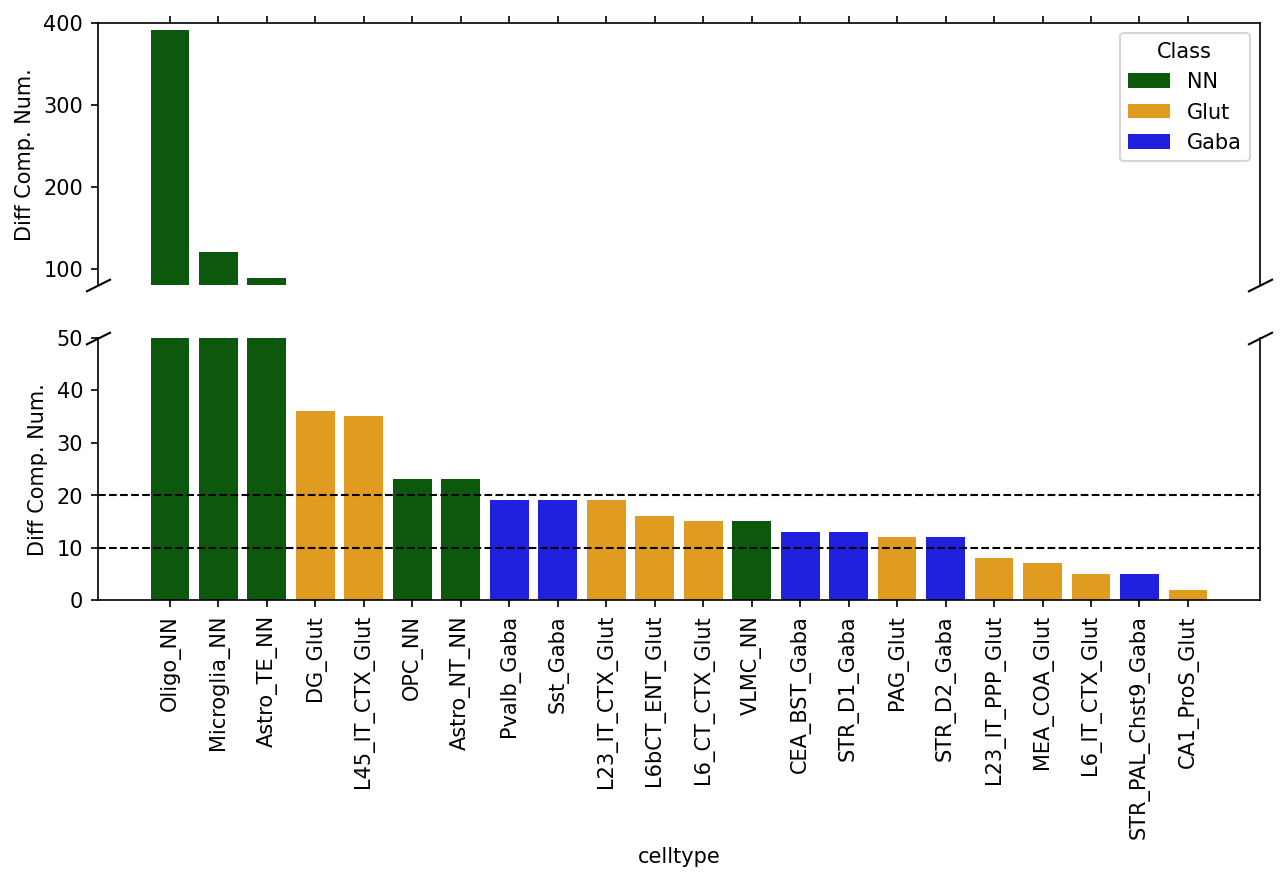

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,5),dpi = 150, sharex=True)

sns.barplot(x='celltype', 
            y="Diff Comp. Num.", 
            hue = 'Class',
            palette = class_palette,
            data = to_plot,
            ax = ax1,
           dodge=False)

sns.barplot(x='celltype', 
            y="Diff Comp. Num.", 
            hue = 'Class',
            palette = class_palette,
            data = to_plot,
            ax = ax2,
           dodge=False)
ax2.get_legend().remove()

ax1.set_ylim(80, 400)  # outliers only
ax2.set_ylim(0,50)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.axhline(y = 10, ls = '--', c = 'black', lw = 1)
ax2.axhline(y = 20, ls = '--', c = 'black', lw = 1)
#ax2.axhline(y = 150, ls = '--', c = 'black', lw = 1)

# ax1.set_xticks([])
# ax1.set_xticklabels([])
# ax2.set_xticks([])
# ax2.set_xticklabels([])


plt.xticks(rotation=90)

fig.savefig(f"figure/age-diff-comp.count.pdf", bbox_inches = 'tight')
plt.show()